# Housing Data 

## This is step 2 of the data science pipeline

In [65]:
# import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

In [68]:
df = pd.read_csv('train.csv')

In [67]:
# Examine the top five records of the data.

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### There are many factors to consider in cleaning this data set.  However, the most critical features appear to be of the proper type-- the dependent variable we are modelling for- Sale Price

#### Eliminate NaN column data. The logic behind this rational is that there are so many features of this data set--80. It would be more manageable if the most important features were kept. At this stage, it would be wise to do away with NaN's. In the spirit of making a more simplistic model instead of a black box. I will also eliminate other columns based on my own personal judgement. 

In [5]:
df.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [6]:
df.shape

(1460, 81)

In [7]:
df_no_NaN = df.dropna(axis="columns")

In [8]:
df_no_NaN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [9]:
df_no_NaN = df_no_NaN.set_index("Id")

In [10]:
# combine bathrooms into one

df_no_NaN["Bathrooms"]= df_no_NaN["FullBath"] + df_no_NaN["HalfBath"]

In [11]:
df_no_NaN.shape

(1460, 62)

In [12]:
df_no_NaN["Bathrooms"]

Id
1       3
2       2
3       3
4       1
5       3
       ..
1456    3
1457    2
1458    2
1459    1
1460    2
Name: Bathrooms, Length: 1460, dtype: int64

In [13]:
df_no_NaN['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [14]:
df_no_NaN['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [16]:
df_no_NaN.index.name = 'House_ID'

In [18]:
df_no_NaN.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Bathrooms
House_ID,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,2,2008,WD,Normal,208500,3
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,5,2007,WD,Normal,181500,2
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,9,2008,WD,Normal,223500,3
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,2,2006,WD,Abnorml,140000,1
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,12,2008,WD,Normal,250000,3


#### The above are categorical variables, and as such, need to be converted to 'category' data types

In [20]:
df_no_NaN['LotShape'] = df_no_NaN['LotShape'].astype('category')

In [22]:
df_no_NaN['MSSubClass'] = df_no_NaN['MSSubClass'].astype('category')

In [23]:
df_no_NaN['MSSubClass'] = df_no_NaN['MSSubClass'].astype('category')

In [24]:
df_no_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotArea        1460 non-null   int64   
 3   Street         1460 non-null   object  
 4   LotShape       1460 non-null   category
 5   LandContour    1460 non-null   object  
 6   Utilities      1460 non-null   object  
 7   LotConfig      1460 non-null   object  
 8   LandSlope      1460 non-null   object  
 9   Neighborhood   1460 non-null   object  
 10  Condition1     1460 non-null   object  
 11  Condition2     1460 non-null   object  
 12  BldgType       1460 non-null   object  
 13  HouseStyle     1460 non-null   object  
 14  OverallQual    1460 non-null   int64   
 15  OverallCond    1460 non-null   int64   
 16  YearBuilt      1460 non-null   int64   
 17  YearRemodAdd   1460 non-null   in

In [26]:
df_no_NaN.YrSold.head()

House_ID
1    2008
2    2007
3    2008
4    2006
5    2008
Name: YrSold, dtype: int64

In [62]:
df_no_NaN.to_csv("training.csv")

In [28]:
df_no_NaN.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'Bathrooms'],
      dtype='object')

In [29]:
columns = ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'Bathrooms']

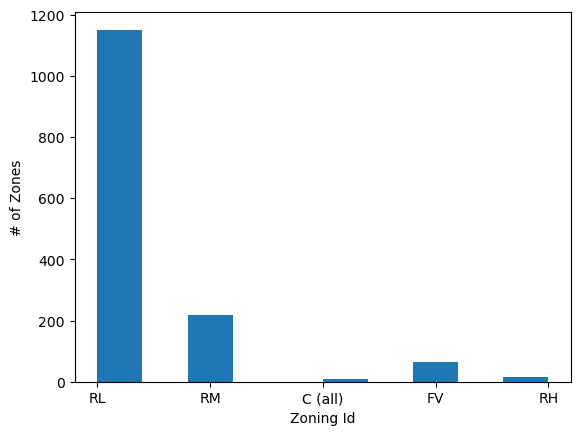

In [32]:
_ = plt.hist(df['MSZoning'])
_ = plt.xlabel('Zoning Id')
_ = plt.ylabel('# of Zones')

#### Drop zones with the other zoning codes. This model will be predicting housing price for RL (residential) homes

In [35]:
df_no_NaN = df_no_NaN[df_no_NaN['MSZoning'] == 'RL'] 

In [37]:
df_no_NaN = df_no_NaN[['MSSubClass', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'Bathrooms']]

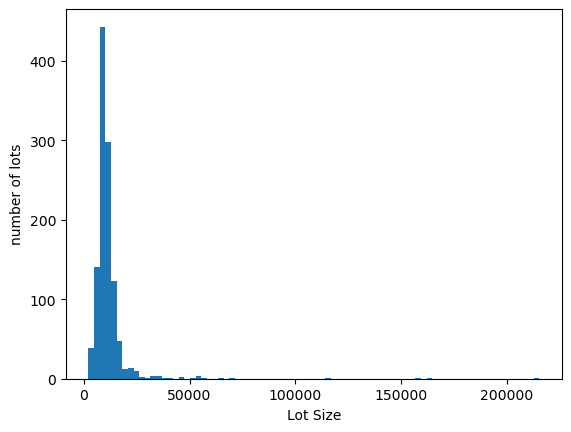

In [47]:
_ = plt.hist(df_no_NaN['LotArea'], bins = 80)
_ = plt.xlabel('Lot Size')
_ = plt.ylabel('number of lots')

In [56]:
df_no_NaN = df_no_NaN[df_no_NaN.LotArea < 20000]

In [57]:
df_no_NaN.shape

(1099, 54)

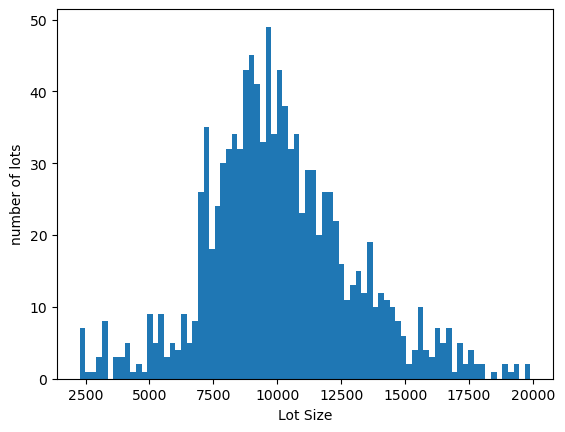

In [61]:
_ = plt.hist(df_no_NaN['LotArea'], bins = 80)
_ = plt.xlabel('Lot Size')
_ = plt.ylabel('number of lots')

#### After some consideration and discussion, it would be wise to narrow the dataset down from the current 60 columns into something more manageable. Here the dataset will be left with thirteen simpler features:

In [77]:
# reload the dataset and start from scratch:

df = pd.read_csv('train.csv')

simple_params = ['LotArea', 'OverallCond', 'BldgType', 'HouseStyle',
                    'YearBuilt',
                    '1stFlrSF', '2ndFlrSF', 'FullBath',
                    'Fireplaces', 
                    'GarageArea', 'GarageCars', 'CentralAir',
                    'YrSold',
                    'SalePrice']

df = df[simple_params]
df.head()

,LotArea,OverallCond,BldgType,HouseStyle,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,Fireplaces,GarageArea,GarageCars,CentralAir,YrSold,SalePrice
0,8450,5,1Fam,2Story,2003,856,854,2,0,548,2,Y,2008,208500
1,9600,8,1Fam,1Story,1976,1262,0,2,1,460,2,Y,2007,181500
2,11250,5,1Fam,2Story,2001,920,866,2,1,608,2,Y,2008,223500
3,9550,5,1Fam,2Story,1915,961,756,1,1,642,3,Y,2006,140000
4,14260,5,1Fam,2Story,2000,1145,1053,2,1,836,3,Y,2008,250000


In [86]:
print(f"rows, columns: {df.shape}")

rows, columns: (1460, 14)


In [88]:
df.dtypes

LotArea         int64
OverallCond     int64
BldgType       object
HouseStyle     object
YearBuilt       int64
1stFlrSF        int64
2ndFlrSF        int64
FullBath        int64
Fireplaces      int64
GarageArea      int64
GarageCars      int64
CentralAir     object
YrSold          int64
SalePrice       int64
dtype: object

In [91]:
df.OverallCond.astype('category')
df.BldgType.astype('category')
df.GarageCars.astype('category')
df.CentralAir.astype('category')
print('')